# OSMnx: Python for Street Networks

refrence https://geoffboeing.com/2016/11/osmnx-python-street-networks/

In [ ]:
# 安装
# !pip install osmnx

OSMnx 是一个 Python 包，用于从 OpenStreetMap 检索、建模、分析和可视化街道网络。 用户可以使用一行 Python 代码下载步行、驾驶或骑自行车的城市网络并对其进行建模，然后轻松分析和可视化它们。 您可以轻松下载并使用便利设施/兴趣点、建筑物占地面积、高程数据、街道方位/方向和网络路由。

In [1]:
import osmnx as ox

## 1. 获取行政区域边界和shapefile

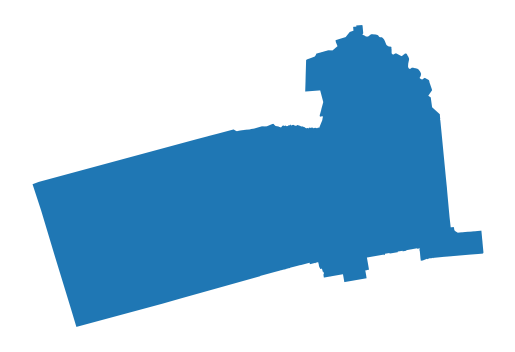

In [3]:
city = ox.geocode_to_gdf('Berkeley, California')
ax = ox.project_gdf(city).plot()
_ = ax.axis('off')

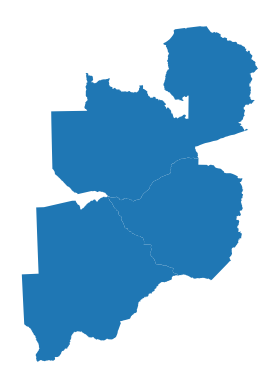

In [4]:
places = ox.geocode_to_gdf(['Botswana', 'Zambia', 'Zimbabwe'])
places = ox.project_gdf(places)
ax = places.plot()
_ = ax.axis('off')

## 2.下载街道网络并建模

您可以指定几种不同的网络类型：

“drive”——获得可行驶的公共街道（但不是服务道路）
'drive_service' – 获取可行驶的公共街道，包括服务道路
'walk' – 获取行人可以使用的所有街道和路径（此网络类型忽略单向方向性）
'bike' – 获取骑自行车者可以使用的所有街道和路径
'all' – 下载所有（非私有）OSM 街道和路径
'all_private' – 下载所有 OSM 街道和路径，包括私人访问的街道和路径

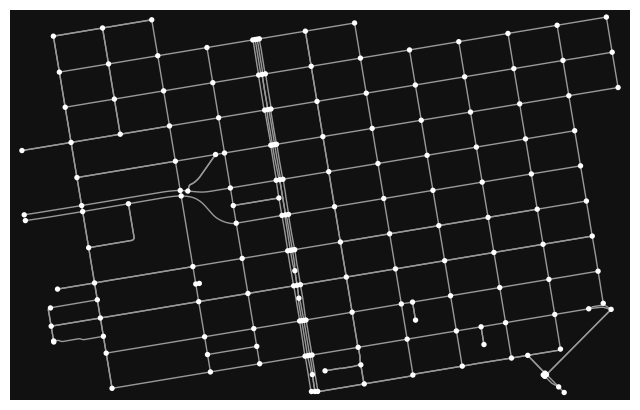

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [5]:
# 2a) 来自边界框的街道网络
G = ox.graph_from_bbox(37.79, 37.78, -122.41, -122.43, network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

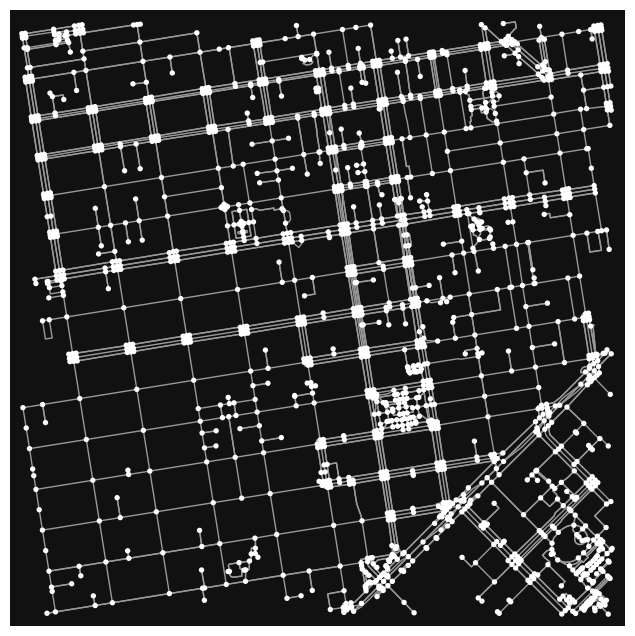

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [6]:
# 2b) 从经纬度点开始的街道网络
# 获取经纬度点 0.75 公里范围内（沿网络）的街道网络：
G = ox.graph_from_point((37.79, -122.41), dist=750, network_type='all')
ox.plot_graph(G)

In [ ]:
# 2c) 多边形的街道网络
# G = ox.graph_from_polygon(mission_shape, network_type='drive')
# ox.plot_graph(G)

In [9]:
# 根据地名的街道网络
G = ox.graph_from_place('Los Angeles, California', network_type='drive')

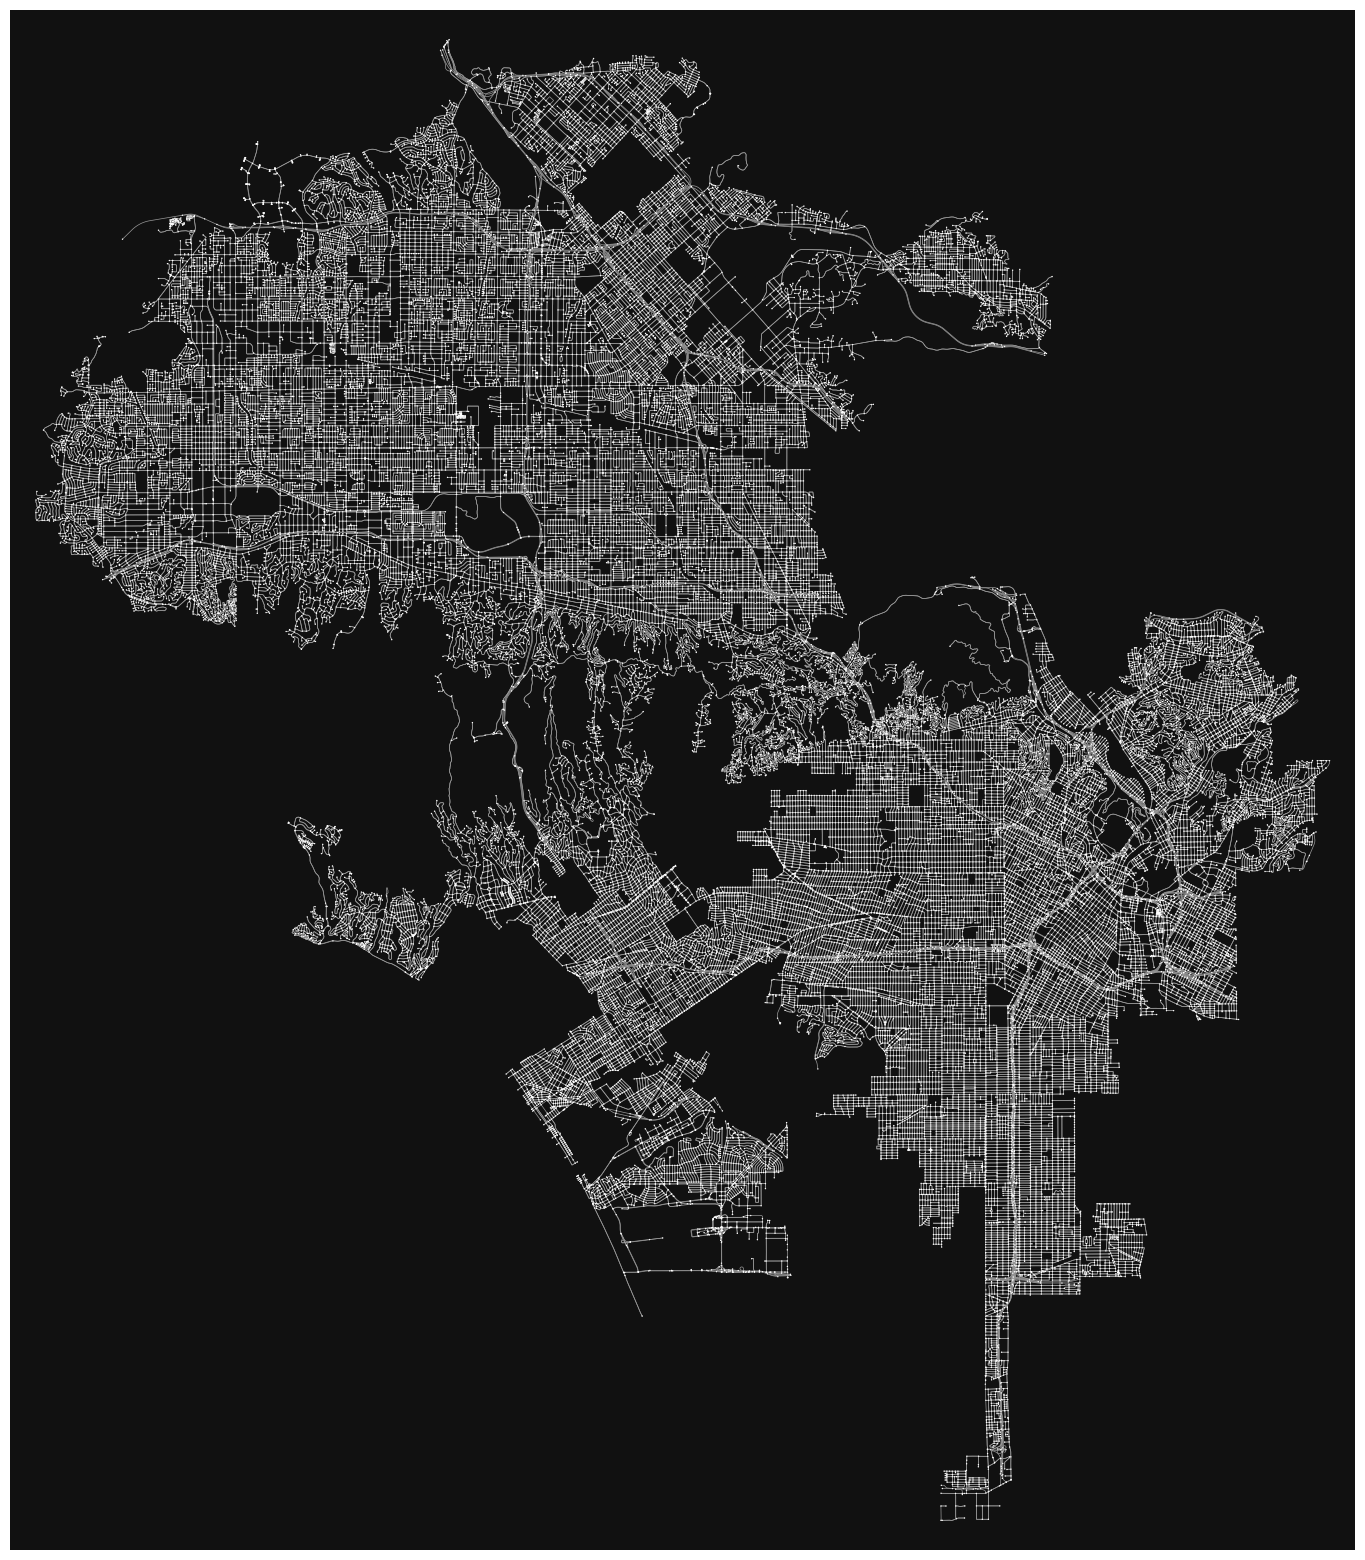

(<Figure size 2000x2000 with 1 Axes>, <Axes: >)

In [12]:
ox.plot_graph(G, figsize=(20,20), node_size=1, edge_linewidth=0.5)

In [13]:
places = ['Los Altos, California, USA',
          {'city':'Los Altos Hills', 'state':'California'},
          'Loyola, California']
G = ox.graph_from_place(places, network_type='drive')


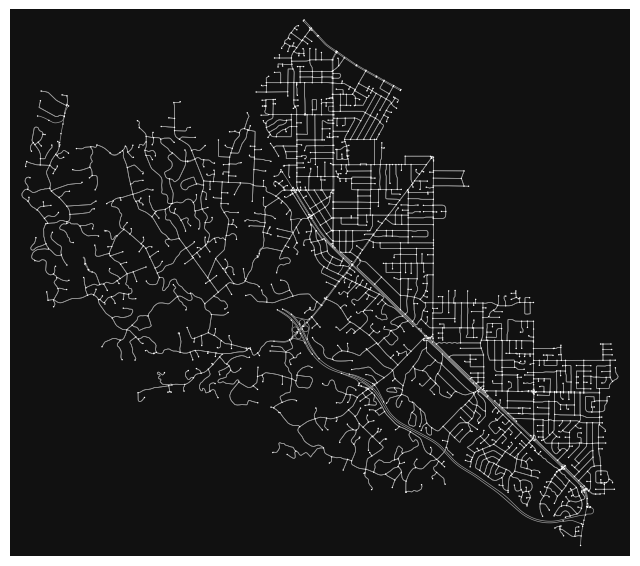

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [15]:
ox.plot_graph(G, figsize=(8,8), node_size=1, edge_linewidth=0.5)

## 3. 修正并简化网络拓扑

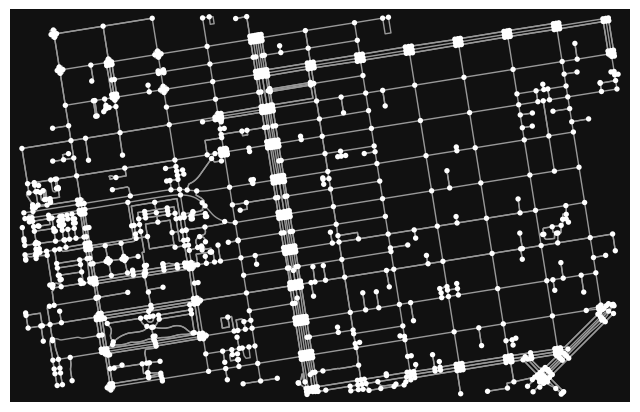

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
G = ox.graph_from_bbox(37.79, 37.78, -122.41, -122.43, network_type='all')
#G2 = ox.consolidate_intersections(G, tolerance=10, rebuild_graph=True, dead_ends=True)
ox.plot_graph(G)

In [6]:
nodes, edges = ox.utils_graph.graph_to_gdfs(G)
edges.index.names

FrozenList(['u', 'v', 'key'])

In [8]:
nodes.index.names

FrozenList(['osmid'])

In [81]:
# 筛选出类型为字符串的值
filtered_highway_values = edges['highway'][edges['highway'].apply(lambda x: isinstance(x, str))]
# 获取筛选后的唯一值
unique_highway_values = filtered_highway_values.unique()
print(unique_highway_values)


['service' 'residential' 'footway' 'secondary' 'pedestrian' 'primary'
 'tertiary' 'trunk' 'unclassified' 'secondary_link' 'busway' 'steps'
 'cycleway']


In [63]:
nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
65285109,37.781285,-122.422196,3,NaN,POINT (-122.42220 37.78128)
65287111,37.784551,-122.422856,4,traffic_signals,POINT (-122.42286 37.78455)
65287128,37.785429,-122.424719,4,traffic_signals,POINT (-122.42472 37.78543)
65292717,37.781853,-122.429056,4,stop,POINT (-122.42906 37.78185)
65292722,37.782336,-122.429077,2,NaN,POINT (-122.42908 37.78234)


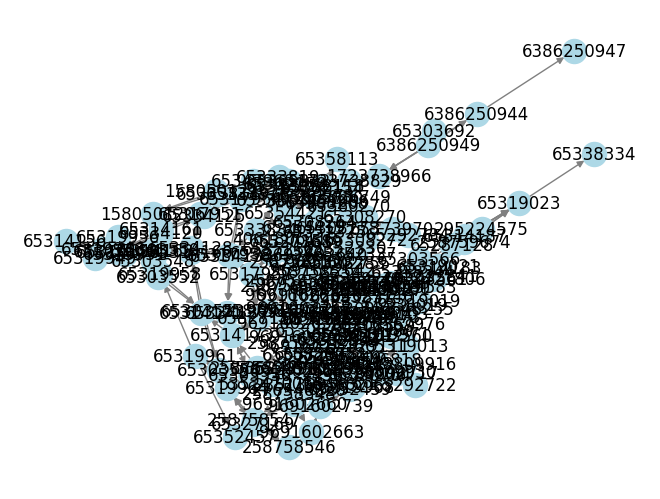

In [46]:
import matplotlib.pyplot as plt
import networkx as nx
# 使用默认布局来绘制图
pos = nx.spring_layout(G)  # 选择布局方式，这里使用了spring布局
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='grey')  # 绘制图
plt.show()  # 显示图形

In [58]:
# 获取所有节点的标识符
all_keys = list(G.nodes)
# 创建从 0 开始的数字映射到标识符上的映射器
mapping = {idx: key for idx, key in enumerate(all_keys)}

In [69]:
node_data = G.nodes(data=True)[mapping[110]]
node_data

{'y': 37.7835243,
 'x': -122.4159033,
 'highway': 'traffic_signals',
 'street_count': 4}

In [73]:

edge = G.edges[(9691602630, 9691602632, 0)]
edge

{'osmid': 1054650001,
 'oneway': True,
 'lanes': '2',
 'name': 'Van Ness Bus Rapid Transit',
 'highway': 'busway',
 'access': 'no',
 'reversed': False,
 'length': 57.53,
 'geometry': <LINESTRING (-122.42 37.781, -122.42 37.781, -122.42 37.781, -122.42 37.781)>}